# Santander data analysis

### Moduły

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode

### Ustawienia podstawowe

In [2]:
#pd.options.mode.use_inf_as_na = True
#pd.set_option('precision', 2)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
%matplotlib inline

# Location variables
DIR = '.'
FILE_NAME = 'train_ver2'
EXTENSION = '.csv'

# Lokalizacja, gdzie mają zostać zapisane wygenerowane wykresy
IMG_PATH = os.path.join(DIR, "Drawings")

# Funkcja służąca do zapisu wykresów do pliku
def save_plot(name, extension="jpg", resolution=300):
    os.makedirs(IMG_PATH, exist_ok=True)
    plot_path = os.path.join(IMG_PATH, name + "." + extension)
    plt.savefig(plot_path, format=extension, dpi=resolution)

### Podział danych
Oryginalny plik z danymi do analizy waży ponad 2GB, stąd podział na mniejsze części, a następnie złączenie kilku z nich w jeden DataFrame.

In [3]:
#chunk_size = 200000
#chunk_no = 1
#path = os.path.join(DIR, FILE_NAME + EXTENSION)

#for chunk in pd.read_csv(PATH, chunksize=chunk_size):
#    chunk.to_csv(FILE_NAME + '_' + str(chunk_no) + EXTENSION, index=False)
#    chunk_no += 1

Każdy plik zawiera 200,000 wierszy.

### Ładowanie danych
Wczytanie wybranych kolumn z 8 plików (1 600 000 wierszy).

In [4]:
missing_values = [' NA', '     NA']
columns = ['ncodpers', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 
           'indresi', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
           'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 
           'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 
           'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
           'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
           'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

# Pierwszy plik
path = os.path.join(DIR, FILE_NAME + '_1' + EXTENSION)
data = pd.read_csv(path, low_memory=False, usecols=columns, na_values=missing_values)

# Łączenie 8 plików CSV w jeden DataFrame
n = 2
m = 8

for i in range(n, m+1):
    path = os.path.join(DIR, FILE_NAME + '_{}'.format(i) + EXTENSION)
    data_to_add = pd.read_csv(path, low_memory=False, usecols=columns)
    data = pd.concat(objs=[data, data_to_add], ignore_index=True)

print('DataFrame zawiera {} wierszy.'.format(len(data)))

data.head(3)

DataFrame zawiera 1600000 wierszy.


,ncodpers,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indresi,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586,ES,H,35,2015-01-12,0.0,6,S,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,ES,V,23,2012-08-10,0.0,35,S,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,ES,V,23,2012-08-10,0.0,35,S,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


### Modyfikacja, czyszczenie danych

In [5]:
# Zmiana hiszpańskich nazw kolumn na angielskie
col_names = list(data.columns)
eng_col_names = ['id', 'country', 'gender', 'age', 'join_date', 'is_new', 'since_mths', 
                 'resid_country', 'city_name', 'is_active', 'hhold_income', 
                 'segment', 'savings_acc', 'guarantees', 'curr_accts', 'derivative_acc', 'payroll_acc', 'junior_acc', 
                 'mas_partic_acc', 'partic_acc', 'partic_plus_acc', 'short_term_depos', 'mid_term_depos',
                 'long_term_depos', 'e-acc', 'funds', 'mortgage', 'pensions_1', 'loans', 'taxes', 'credit_card', 
                 'securities', 'home_acc', 'payroll', 'pensions_2', 'direct_debit']

length = len(eng_col_names)
new_col_names = {}

for i in range(length):
    new_col_names[col_names[i]] = eng_col_names[i]

data.rename(columns=new_col_names, inplace=True)

In [6]:
# Czyszczenie danych
income_median = data['hhold_income'].median()
replace_nan = {'hhold_income': income_median, 'payroll': 0, 'pensions_2': 0}
data.fillna(value = replace_nan, inplace=True)

# Korekta wartości w kolumnie 'cust_gender'
cond_h = data['gender'] == 'H' # = F (female)
cond_v = data['gender'] == 'V' # = M (male)
data.loc[cond_h, 'gender'] = 'F'
data.loc[cond_v, 'gender'] = 'M'

# Koretka wartości w kolumnie 'segment'
cond_top = data['segment'] == '01 - TOP' # = VIP
cond_partic = data['segment'] == '02 - PARTICULARES' # = Individuals
cond_univ = data['segment'] == '03 - UNIVERSITARIO' # = Student
data.loc[cond_top, 'segment'] = 'VIP'
data.loc[cond_partic, 'segment'] = 'Individuals'
data.loc[cond_univ, 'segment'] = 'Students'

In [7]:
# Zmiana typów danych dla poszczególnych kolumn
col_names = list(data.columns)

numeric_cols = ['age', 'since_mths']
integer_cols = ['payroll', 'pensions_2']
date_cols = ['join_date']
categorical_cols = ['gender', 'is_new', 'is_active', 'segment']

for col in col_names:
    if col in numeric_cols:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    elif col in integer_cols:
        data[col] = data[col].astype('int64')
    elif col in date_cols:
        data[col] = pd.to_datetime(data[col], errors='coerce')
    elif col in categorical_cols:
        data[col] = data[col].astype('category', errors='ignore')

In [8]:
data.head(3)

,id,country,gender,age,join_date,is_new,since_mths,resid_country,city_name,is_active,hhold_income,segment,savings_acc,guarantees,curr_accts,derivative_acc,payroll_acc,junior_acc,mas_partic_acc,partic_acc,partic_plus_acc,short_term_depos,mid_term_depos,long_term_depos,e-acc,funds,mortgage,pensions_1,loans,taxes,credit_card,securities,home_acc,payroll,pensions_2,direct_debit
0,1375586,ES,F,35.0,2015-01-12,0.0,6.0,S,MALAGA,1.0,87218.10,Individuals,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1050611,ES,M,23.0,2012-08-10,0.0,35.0,S,CIUDAD REAL,0.0,35548.74,Students,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1050612,ES,M,23.0,2012-08-10,0.0,35.0,S,CIUDAD REAL,0.0,122179.11,Students,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Analiza

In [9]:
df = data.copy()

#### 1. Wiek klientów

In [10]:
age_total = df.groupby(['age']).count()['id'].sort_values(ascending=False)
age_total = age_total.reset_index().rename(columns={'id': 'total'})
age_total['age'] = age_total['age'].astype('int')

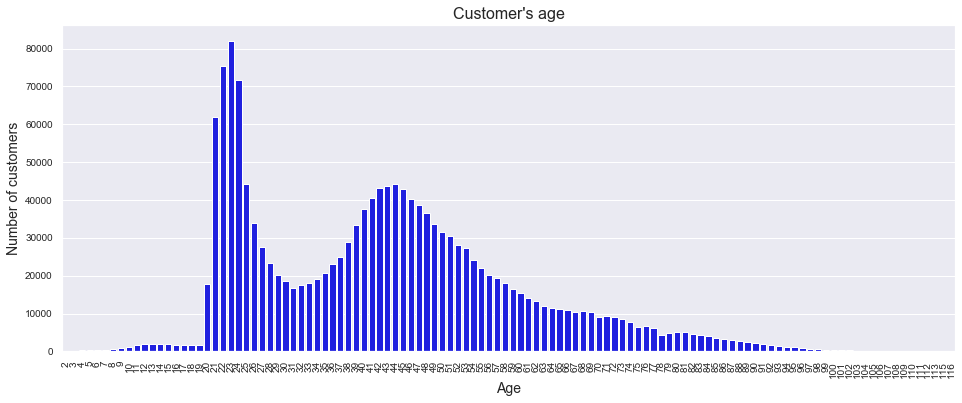

In [11]:
plt.figure(figsize=(16,6))
sns.set()
sns.barplot(age_total['age'], age_total['total'], color='blue')
plt.xlabel('Age', size=14)
plt.ylabel('Number of customers', size=14)
plt.xticks(size=10, rotation='vertical')
plt.yticks(size=10)
plt.title('Customer\'s age', size=16)
save_plot('Customer_age')
plt.show()

#### 2. Płeć klientów

In [12]:
gender = df.groupby(['gender']).count()['id']
gender = gender.reset_index().rename(columns={'id': 'total'})

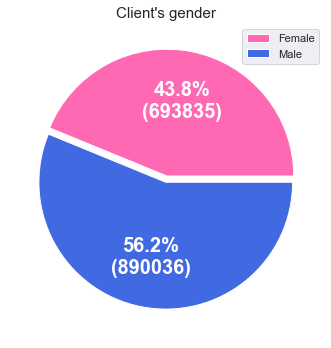

In [13]:
labels = ['Female', 'Male']
colors = ['hotpink','royalblue']

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(5,5), subplot_kw=dict(aspect="equal"))
explode = (0.05, 0)
wedges, texts, autotexts = ax.pie(gender['total'], autopct=lambda pct: func(pct, gender['total']), textprops=dict(color="w"),
                                 colors=colors, explode=explode)
plt.title('Client\'s gender', size=15)
plt.setp(autotexts, size=20, weight="bold")
plt.legend(labels, loc='best')
fig.tight_layout()
save_plot('Customer_gender')
plt.show()

#### 3. Pochodzenie klientów

In [14]:
countries = df.groupby(['country']).count()['id'].sort_values(ascending=False)
countries = countries.reset_index().rename(columns={'id': 'total'})

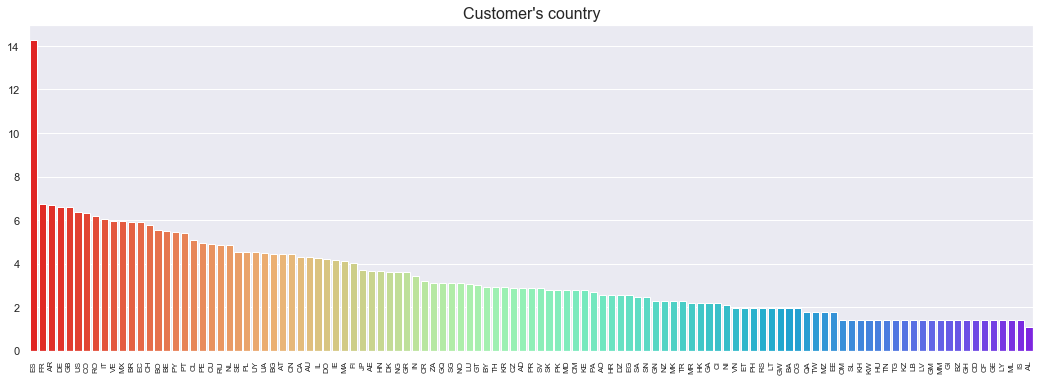

In [15]:
plt.figure(figsize=(18,6))
sns.barplot(countries['country'], np.log1p(countries['total']), palette='rainbow_r')
plt.xticks(size=8, rotation='vertical')
plt.xlabel('')
plt.ylabel('')
plt.title('Customer\'s country', size=16)
save_plot('Customer_country')
plt.show()

#### 4. Liczba klientów w poszczególnych prowincjach/regionach

In [16]:
cities = df.groupby(['city_name']).count()['id']
cities = cities.reset_index().rename(columns={'id':'total'})
cities['city_name'] = cities['city_name'].str.lower()

cities.loc[9, 'city_name'] = 'vizcaya'
cities.loc[7, 'city_name'] = 'baleares'
cities.loc[18, 'city_name'] = 'a coruna'
cities.loc[20, 'city_name'] = 'guipuzcoa'
cities.loc[28, 'city_name'] = 'lleida'
cities.loc[37, 'city_name'] = 'las palmas'
cities.loc[39, 'city_name'] = 'la rioja' 

In [17]:
# Ładowanie mapy
map_path = os.path.join("./gadm36_ESP_shp/gadm36_ESP_2.shp")
map_data = gpd.read_file(map_path, encoding = "utf-8")
map_data.rename(columns={'NAME_2': 'city_name'}, inplace=True)

# Korekta wartości w kolumnie 'city_name' (zmiana kodowania)
for reg in map_data['city_name']:
    accented = reg
    unaccented = unidecode.unidecode(accented)
    cond_accent = map_data['city_name'] == accented
    map_data.loc[cond_accent, 'city_name'] = unaccented.lower()
    
# (Mercator projection)
crs = {'init':'epsg:3395'}
map_data = map_data.to_crs(crs=crs)

In [18]:
# Łączenie parametrów mapy z danymi liczbowymi
region = pd.merge(map_data, cities, on='city_name', how='inner')

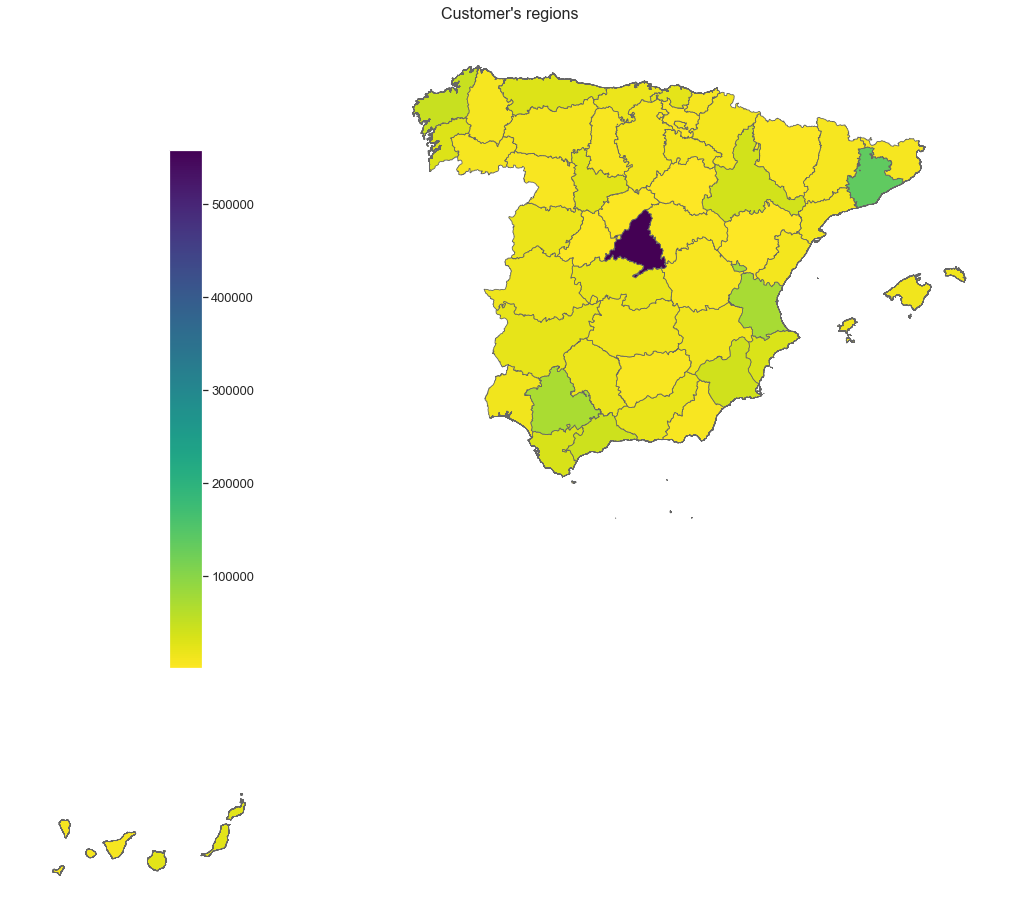

In [40]:
fig, ax = plt.subplots(1, figsize=(18,18))
vmin=region['total'].min()
vmax=region['total'].max()
region.plot(column='total', ax=ax, cmap='viridis_r', linewidth=0.8, edgecolor='0.4', legend=False)
plt.title("Customer\'s regions", size=16, loc='center')
plt.axis('off')
cax = fig.add_axes([0.25, 0.35, 0.025, 0.4]) #lokalizacjai rozmiar legendy, [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbr = fig.colorbar(sm, cax=cax,)
cbr.ax.tick_params(labelsize=13) 
save_plot('Customer_region')
plt.show()

#### 6. Liczba klientów, którzy dołączyli w poszczególnych miesiącach

In [20]:
df['month'] = df['join_date'].dt.month
df['year'] = df['join_date'].dt.year

join_time = df.groupby(['year', 'month']).count()['id']
join_time = join_time.reset_index().rename(columns={'id': 'total'})
join_time['month'] = join_time['month'].astype('int')
join_time['year'] = join_time['year'].astype('int')
join_time = join_time.pivot(index='month', columns='year', values='total').fillna(0)
join_time = join_time.loc[:,:].astype(int)

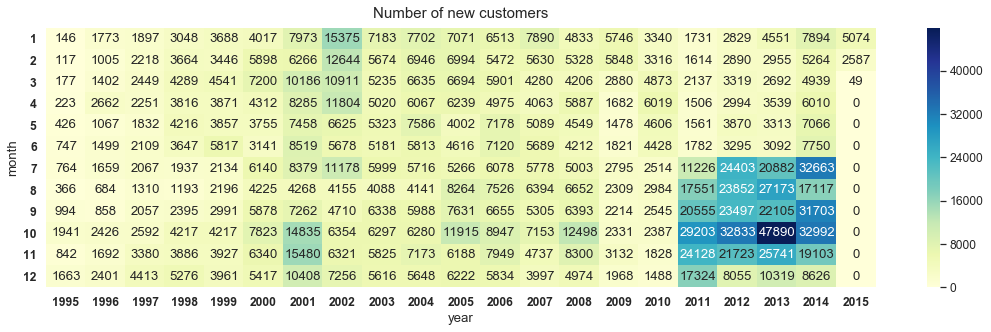

In [39]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_axes([0.4,0.8,0.8,0.2]) # rozmiar komórki
sns.set(font_scale=1.1)
sns.heatmap(join_time, ax=ax, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.xticks(weight='bold')
plt.yticks(weight='bold', rotation = 0)
plt.title('Number of new customers', size=15, pad=10)
save_plot('Customer_new')
plt.show()

#### 6. Aktywność klientów w poszczególnych segmentach

In [22]:
activity = df.groupby(['segment', 'is_active']).count()['id']
activity = activity.reset_index().rename(columns={'id': 'total'})

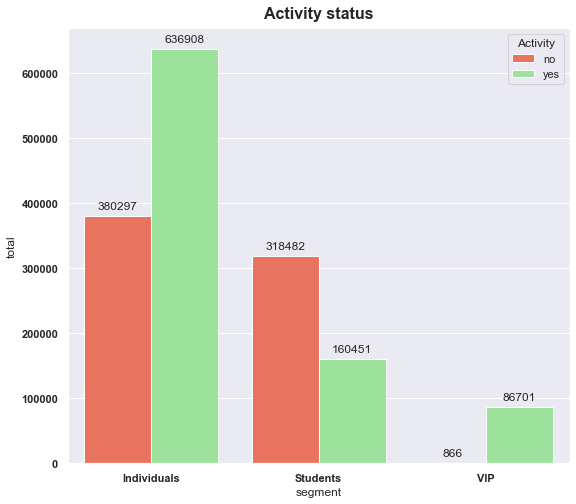

In [23]:
labels = ['no', 'yes']
colors = ['tomato', 'lightgreen']

plt.figure(figsize=(9, 8))
sns.set(style='darkgrid')
sbplt = sns.barplot(data=activity, x='segment', y='total', hue='is_active', palette=colors)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.title('Activity status', weight='bold', size=16, pad=10)

h, l = sbplt.get_legend_handles_labels()
plt.legend(h, labels, title='Activity')

# Adnotacje
for p in sbplt.patches:
    sbplt.annotate(format(int(p.get_height()), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')
save_plot('Segment_activity')
plt.show()

#### 7. Aktywność klientów z uwagi na płeć oraz przedział wiekowy

In [24]:
df.loc[(df['age'] < 20), 'age_section'] = '< 20'
df.loc[(df['age'] >= 20) & (df['age'] < 30), 'age_section'] = '20s'
df.loc[(df['age'] >= 30) & (df['age'] < 40), 'age_section'] = '30s'
df.loc[(df['age'] >= 40) & (df['age'] < 50), 'age_section'] = '40s'
df.loc[(df['age'] >= 50) & (df['age'] < 60), 'age_section'] = '50s'
df.loc[(df['age'] >= 60) & (df['age'] < 70), 'age_section'] = '60s'
df.loc[(df['age'] >= 70) & (df['age'] < 80), 'age_section'] = '70s'
df.loc[(df['age'] >= 80), 'age_section'] = '80+'

In [25]:
cond_active = df['is_active'] == 1.0

actives_only = df[cond_active].groupby(['age_section', 'gender']).count()['id']
actives_only = actives_only.reset_index().rename(columns={'id': 'total'})

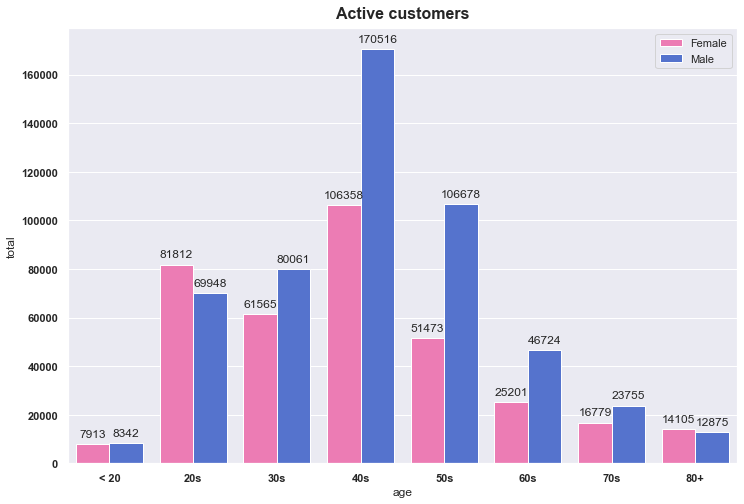

In [26]:
labels = ['Female', 'Male']
colors=['hotpink','royalblue']
order = ['< 20','20s','30s','40s','50s','60s','70s','80+']

plt.figure(figsize=(12, 8))
sbplt = sns.barplot(data=actives_only, x='age_section', y='total', hue='gender', palette=colors, order=order)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlabel('age')
plt.title('Active customers', weight='bold', size=16, pad=10)

h, l = sbplt.get_legend_handles_labels()
plt.legend(h, labels)

# Adnotacje
for p in sbplt.patches:
    sbplt.annotate(format(int(p.get_height()), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                   va = 'center', xytext = (0, 10), textcoords = 'offset points')
save_plot('Customer_actives_only')
plt.show()

#### 8. Liczba klientów na podstawie przychodów brutto gospodarstw domowych

In [27]:
df.loc[(df['hhold_income'] < 50000), 'inc_section'] = '< 50k'
df.loc[(df['hhold_income'] >= 50000) & (df['hhold_income'] < 100000), 'inc_section'] = '50k-100k'
df.loc[(df['hhold_income'] >= 100000) & (df['hhold_income'] < 150000), 'inc_section'] = '100k-150k'
df.loc[(df['hhold_income'] >= 150000) & (df['hhold_income'] < 200000), 'inc_section'] = '150k-200k'
df.loc[(df['hhold_income'] >= 200000), 'inc_section'] = '200k <'

In [28]:
income = df.groupby(['inc_section']).count()['id'].sort_values(ascending=False)
income = income.reset_index().rename(columns={'id': 'total'})

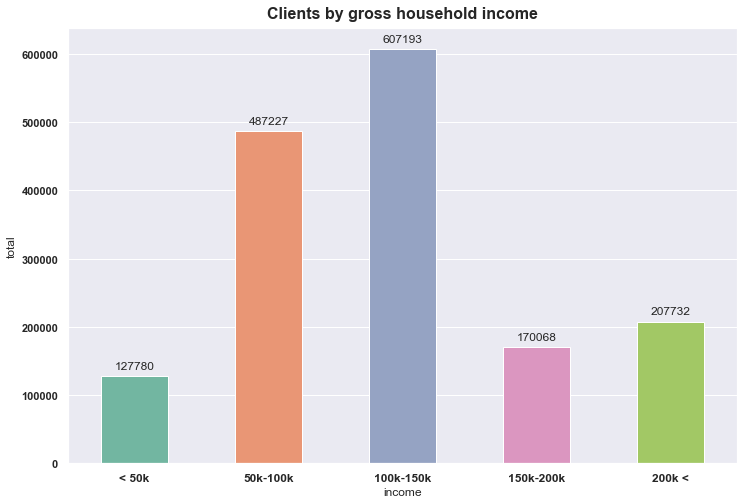

In [29]:
order = ['< 50k','50k-100k','100k-150k','150k-200k','200k <']

# Szerokość słupków oraz adnotacje
def new_params(ax, new_value) :
    for p in sbplt.patches:
        curr_width = p.get_width()
        diff = curr_width - new_value
        # zmiana szerokości
        p.set_width(new_value)
        # osiowanie słupków
        p.set_x(p.get_x() + diff * 0.5)
        # adnotacje
        sbplt.annotate(format(int(p.get_height()), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', 
                       va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.figure(figsize=(12, 8))
sbplt = sns.barplot(data=income, x='inc_section', y='total', palette='Set2', order=order)
plt.xticks(weight='bold', size=12)
plt.yticks(weight='bold')
plt.xlabel('income')
plt.yticks(weight='bold')
plt.title('Clients by gross household income', weight='bold', size=16, pad=10)

new_params(sbplt, 0.5)

save_plot('Customer_income')
plt.show()

#### 9. Popularność poszczególnych produktów

In [30]:
product_cols = df.columns[12:36].tolist()
pop = df[product_cols].sum().astype('int').sort_values(ascending=False)
pop = pop.reset_index().rename(columns={'index': 'product', 0: 'total'})

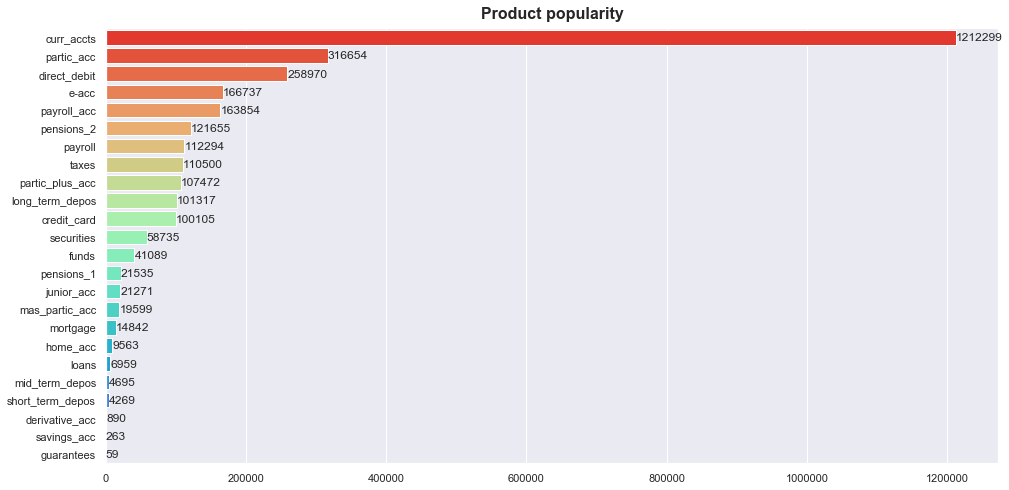

In [31]:
plt.figure(figsize=(16, 8))
sbplt = sns.barplot(data=pop, x='total', y='product', palette='rainbow_r')
plt.xlabel('')
plt.ylabel('')
plt.title('Product popularity', weight='bold', size=16, pad=10)

# Adnotacje
for p in sbplt.patches:
    sbplt.annotate(format(int(p.get_width()), 'd'), (p.get_width(), p.get_y() + p.get_height() / 2), ha = 'left', 
                   va = 'center')
save_plot('Product_pop')
plt.show()

#### 10. Popularność produków z uwagi na płeć

In [32]:
pop_gender = df.loc[:, ['gender']].join(df.loc[:, 'savings_acc':'direct_debit'])
pop_gender = pop_gender.groupby(['gender']).sum()
pop_gender = pop_gender.T

<Figure size 1008x1008 with 0 Axes>

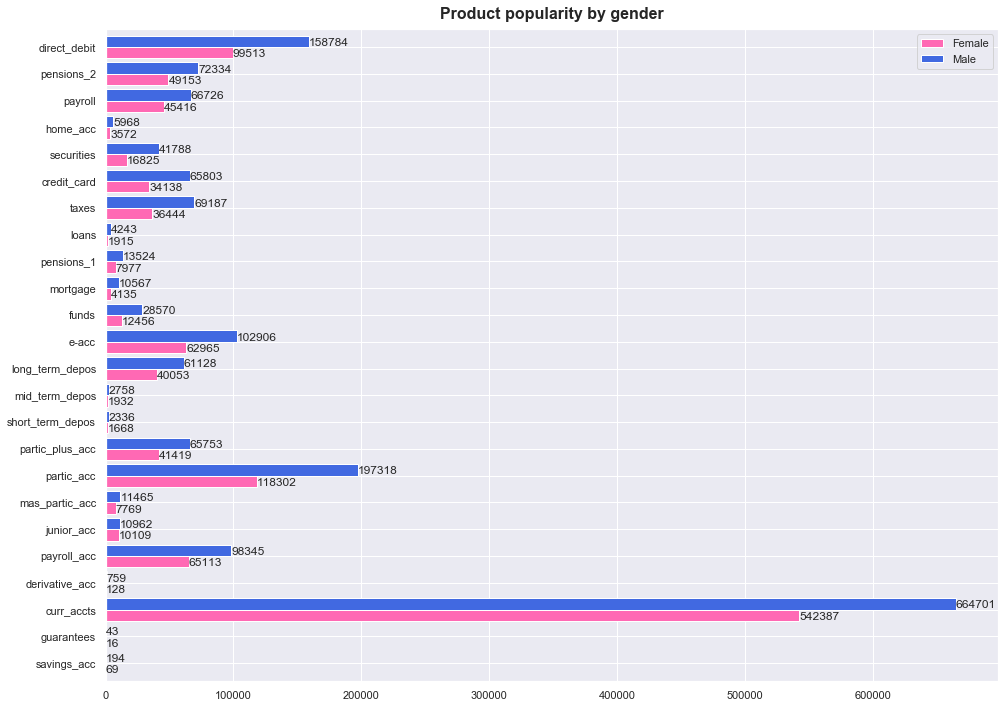

In [33]:
labels=['Female', 'Male']
colors=['hotpink','royalblue']

plt.figure(figsize=(14, 14))
sbplt = pop_gender.plot(kind='barh', figsize=[16,12], color=colors, width=0.85)
plt.title('Product popularity by gender', weight='bold', size=16, pad=10)

h, l = sbplt.get_legend_handles_labels()
plt.legend(h, labels)

# Adnotacje
for p in sbplt.patches:
    sbplt.annotate(format(int(p.get_width()), 'd'), (p.get_width(), p.get_y() + p.get_height() / 2.5), ha = 'left', 
                   va = 'center', size=12)
save_plot('Product_pop_gender')
plt.show()

#### 11. Popularność produków w poszczególnych segmentach konsumenckich

In [34]:
pop_segment = df.loc[:, ['segment']].join(df.loc[:, 'savings_acc':'direct_debit'])
pop_segment = pop_segment.groupby(['segment']).sum()
pop_segment = pop_segment.T

<Figure size 1008x1008 with 0 Axes>

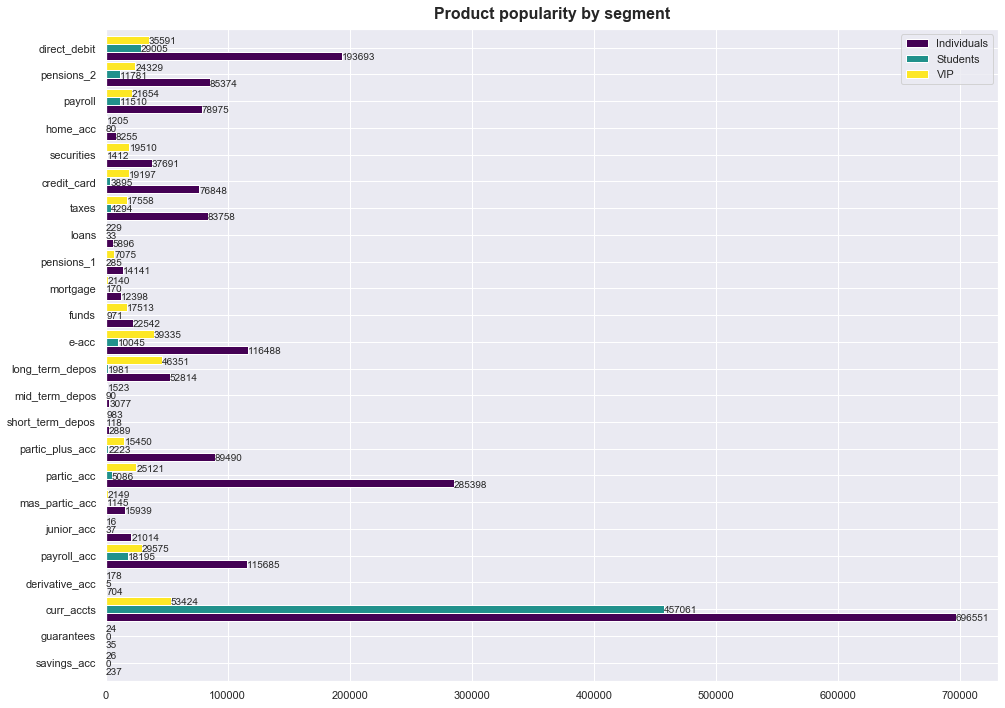

In [35]:
plt.figure(figsize=(14, 14))
sbplt = pop_segment.plot(kind='barh', figsize=[16,12], colormap='viridis', width=0.9)
plt.title('Product popularity by segment', weight='bold', size=16, pad=10)
plt.legend(title='')

# Adnotacje
for p in sbplt.patches:
    sbplt.annotate(format(int(p.get_width()), 'd'), (p.get_width(), p.get_y() + p.get_height() / 3), ha = 'left', 
                   va = 'center', size=10)
save_plot('Product_pop_segment')
plt.show()